In [1]:
import cv2
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import os
import cvxpy as cp

In [19]:
def save_image(img, save_path):
    """save image
    Args:
        img (np.ndarray or PIL.Image.Image): image to save
        save_path (str): save path
    """
    img = np.uint8(np.array(img))
    save_dir = os.path.dirname(save_path)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    if not save_path.endswith('.jpg'):
        save_path = save_path + '.jpg'
    cv2.imwrite(save_path, img)

def getImgAsMatFromFile(filename, isGray=True):
    img = cv2.imread(filename)
    if isGray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        return np.mat(img)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        return np.array(img)

def plotImg(imgMat, isGray=True):
    if isGray:
        plt.imshow(imgMat, cmap=plt.cm.gray)
    else:
        plt.imshow(imgMat)
    plt.show()

## PCA
压缩图像

In [77]:
def pca_(im, k, ganrantee=None):
    """PCA
    Args:
        im (np.ndarray): image
        k (int): number of principal components
    Returns:
        np.ndarray: compressed image
    """
    im = np.array(im, dtype=float)
    m, n = im.shape
    # mean of each column
    mean = im.mean(axis=0)
    # normalize
    im_norm = im - mean
    # covariance matrix
    cov = np.dot(im_norm.T, im_norm) / (m - 1)
    # eigenvalue and eigenvector
    eig_vals, eig_vecs = la.eigh(cov)
    # sort
    idx = np.argsort(eig_vals)[::-1]
    eig_vals = eig_vals[idx]
    eig_vecs = eig_vecs[:, idx]
    # satisfy the ganrantee
    if ganrantee is not None:
        if eig_vals[:k].sum() / eig_vals.sum() < ganrantee:
            for i in range(k, len(eig_vals)):
                if eig_vals[:i].sum() / eig_vals.sum() >= ganrantee:
                    k = i
                    break
    # select k eigenvectors
    eig_vecs = eig_vecs[:, :k]
    # project
    im_pca = np.dot(im_norm, eig_vecs)
    # reconstruct
    im_rec = np.dot(im_pca, eig_vecs.T) + mean
    return im_rec

In [78]:
def PCA(pth, k, ganrantee=None):
    im = getImgAsMatFromFile(pth, isGray=True)
    im_rec = np.zeros_like(im)
    im_rec = pca_(im, k, ganrantee)
    plotImg(im_rec, isGray=True)

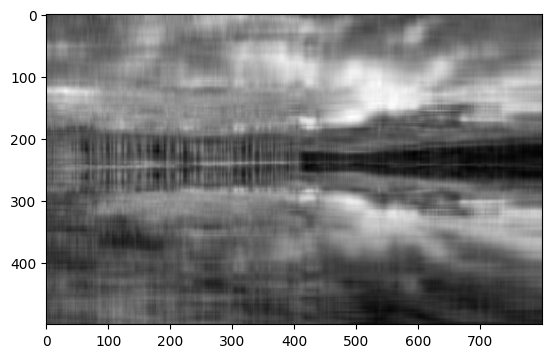

In [85]:
PCA("./figures/lanscape1.jpg", 1, 0.5)

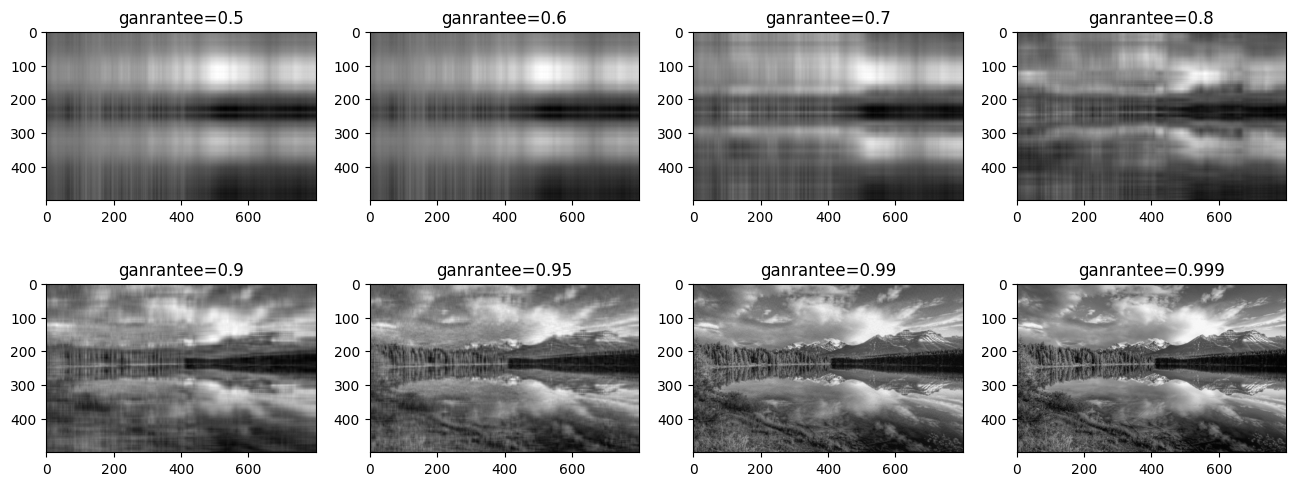

In [90]:
# (0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999)
fig, ax = plt.subplots(2, 4, figsize=(16, 6))
for i, ganrantee in enumerate([0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999]):
    im = getImgAsMatFromFile("./figures/lanscape1.jpg", isGray=True)
    im_rec = pca_(im, 1, ganrantee)
    ax[i // 4, i % 4].imshow(im_rec, cmap=plt.cm.gray)
    ax[i // 4, i % 4].set_title("ganrantee={}".format(ganrantee))

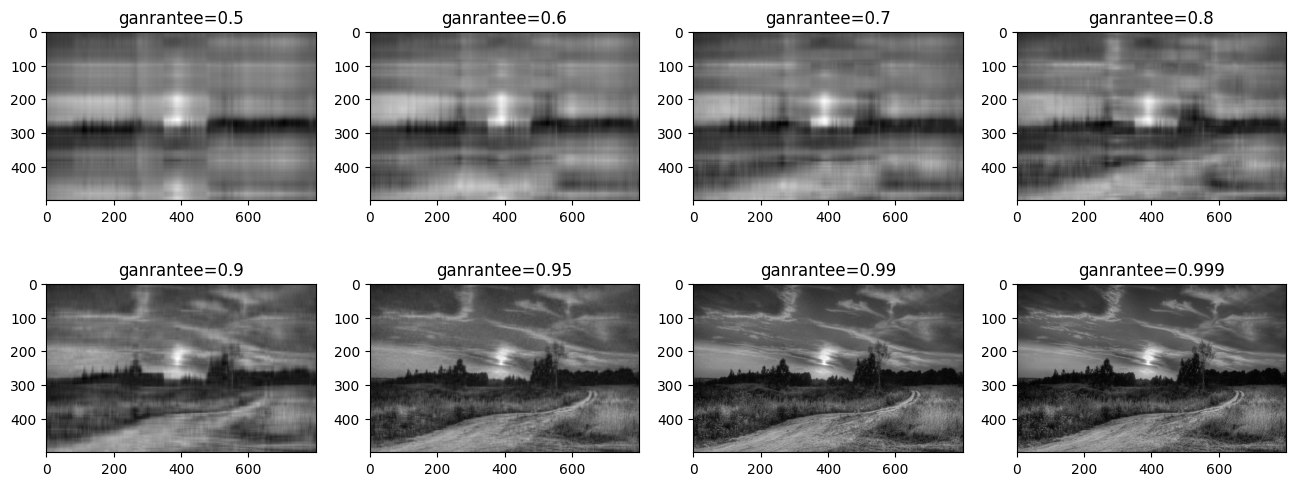

In [91]:
# (0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999)
fig, ax = plt.subplots(2, 4, figsize=(16, 6))
for i, ganrantee in enumerate([0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999]):
    im = getImgAsMatFromFile("./figures/lanscape2.jpg", isGray=True)
    im_rec = pca_(im, 1, ganrantee)
    ax[i // 4, i % 4].imshow(im_rec, cmap=plt.cm.gray)
    ax[i // 4, i % 4].set_title("ganrantee={}".format(ganrantee))

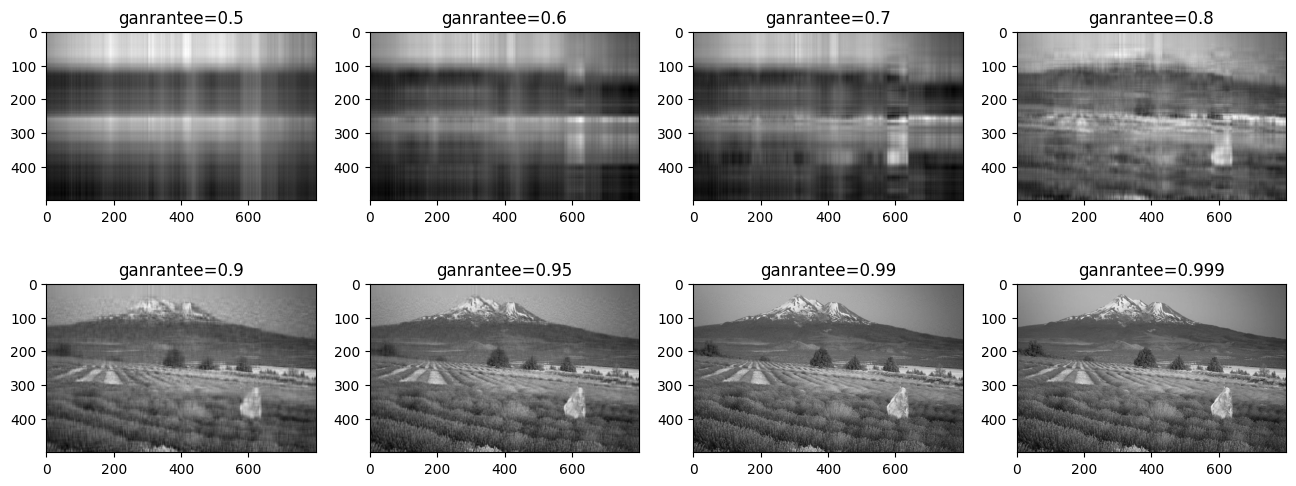

In [92]:
# (0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999)
fig, ax = plt.subplots(2, 4, figsize=(16, 6))
for i, ganrantee in enumerate([0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999]):
    im = getImgAsMatFromFile("./figures/lanscape3.jpg", isGray=True)
    im_rec = pca_(im, 1, ganrantee)
    ax[i // 4, i % 4].imshow(im_rec, cmap=plt.cm.gray)
    ax[i // 4, i % 4].set_title("ganrantee={}".format(ganrantee))

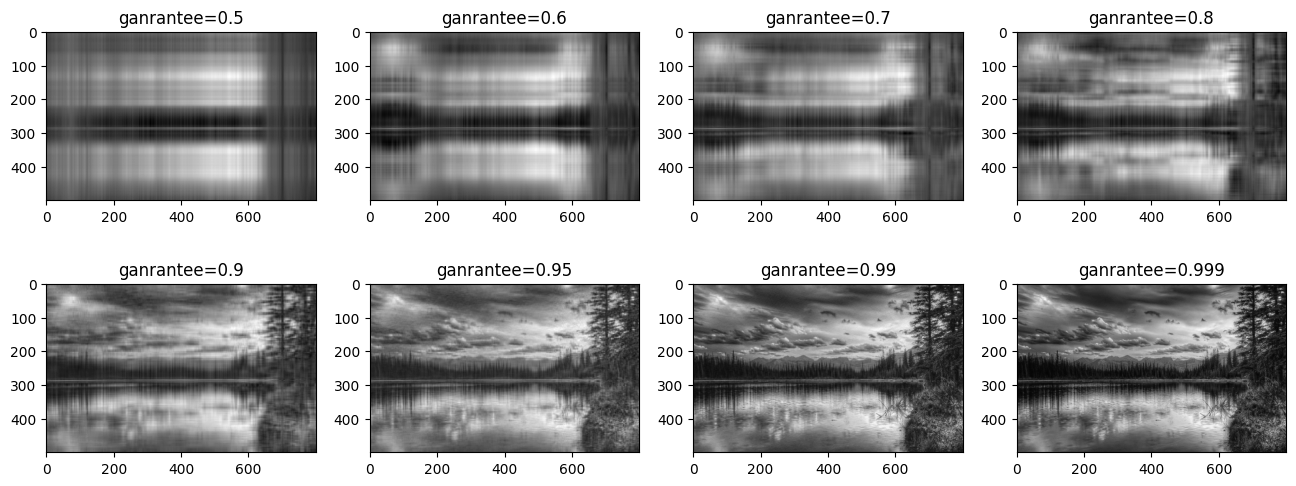

In [93]:
# (0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999)
fig, ax = plt.subplots(2, 4, figsize=(16, 6))
for i, ganrantee in enumerate([0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999]):
    im = getImgAsMatFromFile("./figures/lanscape4.jpg", isGray=True)
    im_rec = pca_(im, 1, ganrantee)
    ax[i // 4, i % 4].imshow(im_rec, cmap=plt.cm.gray)
    ax[i // 4, i % 4].set_title("ganrantee={}".format(ganrantee))

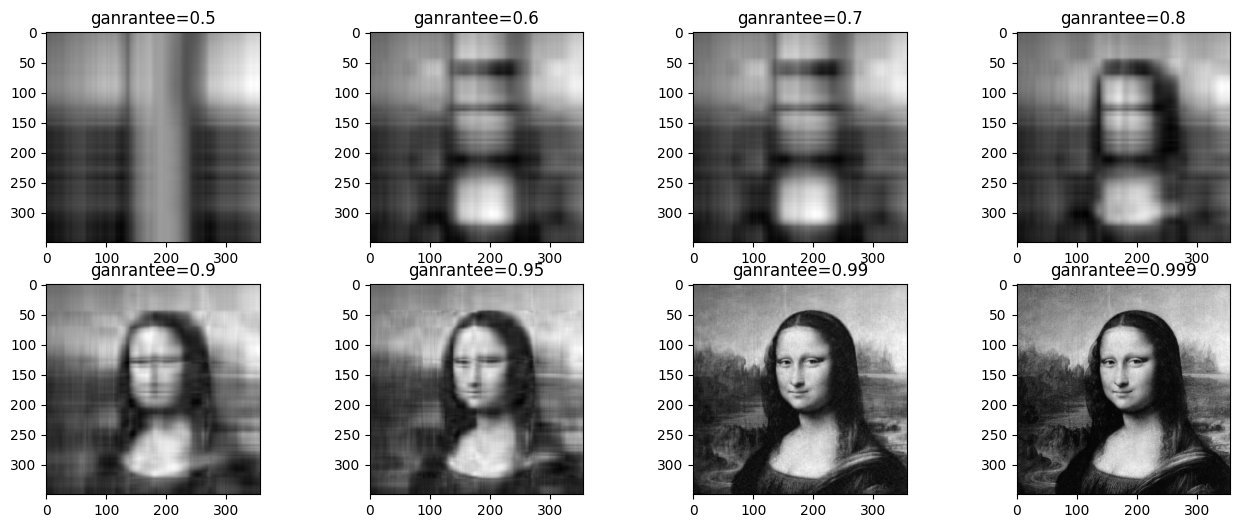

In [94]:
# (0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999)
fig, ax = plt.subplots(2, 4, figsize=(16, 6))
for i, ganrantee in enumerate([0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999]):
    im = getImgAsMatFromFile("./figures/MonaLisa.jpg", isGray=True)
    im_rec = pca_(im, 1, ganrantee)
    ax[i // 4, i % 4].imshow(im_rec, cmap=plt.cm.gray)
    ax[i // 4, i % 4].set_title("ganrantee={}".format(ganrantee))

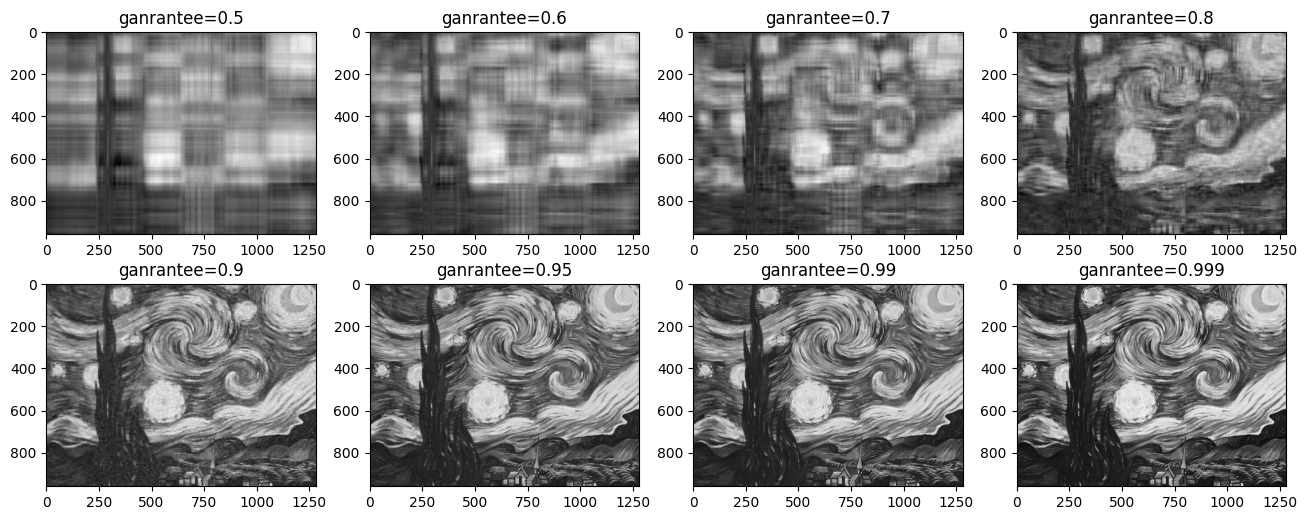

In [95]:
# (0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999)
fig, ax = plt.subplots(2, 4, figsize=(16, 6))
for i, ganrantee in enumerate([0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999]):
    im = getImgAsMatFromFile("./figures/starsky.jpg", isGray=True)
    im_rec = pca_(im, 1, ganrantee)
    ax[i // 4, i % 4].imshow(im_rec, cmap=plt.cm.gray)
    ax[i // 4, i % 4].set_title("ganrantee={}".format(ganrantee))

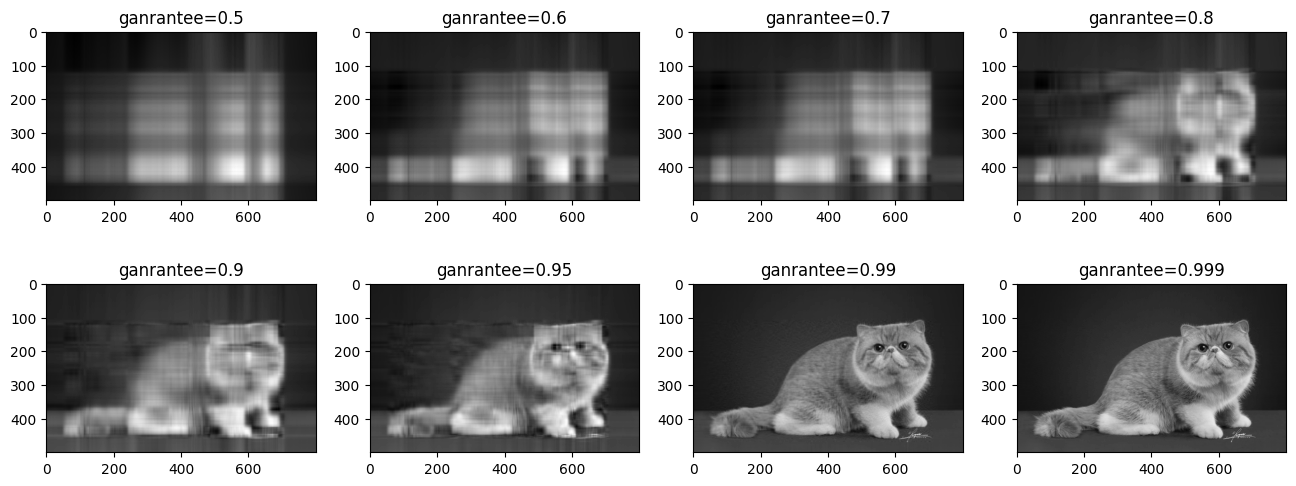

In [97]:
# (0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999)
fig, ax = plt.subplots(2, 4, figsize=(16, 6))
for i, ganrantee in enumerate([0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.999]):
    im = getImgAsMatFromFile("./figures/test.jpg", isGray=True)
    im_rec = pca_(im, 1, ganrantee)
    ax[i // 4, i % 4].imshow(im_rec, cmap=plt.cm.gray)
    ax[i // 4, i % 4].set_title("ganrantee={}".format(ganrantee))

## Robust PCA
迭代算法

In [20]:
def Cut(tau, X):
    '''
    Args: tau >= 0, X is a number or array
    Output: S = sgn(x)*max(|x|-tau,0)
    '''
    if len(X.shape) == 1:
        # print(X.shape)
        X[(X < tau) & (X > -tau)] = 0
        X[X >= tau] = X[X >= tau] - tau
        X[X <= -tau] = X[X <= -tau] + tau
    elif len(X.shape) == 2:
        m, n = X.shape
        X = np.array(np.reshape(X, m*n))
        X[(X < tau) & (X > -tau)] = 0
        X[X >= tau] = X[X >= tau] - tau
        X[X <= -tau] = X[X <= -tau] + tau
        X = X.reshape([m, n])
    else:
        print('Err!')
    return X


def nuc_Cut(tau, X):
    X = np.mat(X)
    m, n = X.shape
    U, s, V = la.svd(X)
    s = Cut(tau, s)
    if m >= n:
        return U[:, :n]*np.diagflat(s)*V
    else:
        return U*np.diagflat(s)*(V[:m, :])


def RPCA(M, mu, lamb, itermax=1000, tol=1e-6):
    '''
    Args: matrix M; mu > 0; lamb > 0 (1/sqrt(n) recomended);
    Output: matrix L,S
        min ||L||_* + lamb ||S||_1
        ->
        min ||L||_* + lamb ||S||_1 + <Y,M-L-S> + mu/2 * ||M-L-S||_F^2
    '''
    m = M.shape[0]
    n = M.shape[1]

    L = cp.Variable((m, n))
    S = cp.Variable((m, n))
    Y = cp.Variable((m, n))

    # 目标函数
    obj = cp.Minimize(cp.norm(L, 'nuc')+lamb*cp.norm(S, 1))

    # 添加约束
    constraints = [L+S == M]

    # 定义增广拉格朗日函数
    aug_lagrangian = obj + cp.Minimize(mu/2 * cp.sum_squares(M-L-S))

    # 构建凸优化问题
    prob = cp.Problem(obj, constraints)

    prob.solve(solver=cp.SCS)
    # 提取结果
    L_opt = L.value
    S_opt = S.value

    return L_opt, S_opt


def RPCA_(M, mu, lamda, max_iter=1000, tol=1e-6):
    '''
    Args: matrix M; mu > 0; lamb > 0 (1/sqrt(n) recomended);
    Output: matrix L,S
        min ||L||_* + lamb ||S||_1
        ->
        min ||L||_* + lamb ||S||_1 + <Y,M-L-S> + mu/2 * ||M-L-S||_F^2
    '''
    m, n = M.shape
    L = np.zeros([m, n])
    S = L
    Y = np.zeros([m, n])

    for i in range(max_iter):
        L = nuc_Cut(1/mu, M-S+Y/mu)
        S = Cut(lamda/mu, M-L+Y/mu)
        Y = Y + mu*(M-L-S)

        if (cp.norm(M-L-S, 'fro').value < tol*cp.norm(M, 'fro').value)\
                & (cp.norm(Y, 1).value < tol):
            print('Converged at iter %d' % i)
            break
    print("Max iterations")

    return L, S


In [21]:
im = getImgAsMatFromFile('figures/1.png')

In [22]:
mu_base = im.shape[0]*im.shape[1]/(4*cp.norm(im, 1).value)
lamda_base = 1/np.sqrt(im.shape[0]*im.shape[1])

In [23]:
mu_base, lamda_base

(0.344343609143593, 0.005405405405405406)

In [10]:
# Ls = {}
# Ss = {}
# for mu in [1/10*mu_base, 1/5*mu_base, 1/2*mu_base, mu_base, 2*mu_base, 5*mu_base, 10*mu_base]:
#     for lamda in [1/10*lamda_base, 1/5*lamda_base, 1/2*lamda_base, lamda_base, 2*lamda_base, 5*lamda_base, 10*lamda_base]:
#         print('mu = %f, lamda = %f' % (mu, lamda))
#         L, S = RPCA_(im, mu, lamda, max_iter=1000, tol=1e-5)
#         Ls[(mu, lamda)] = L
#         Ss[(mu, lamda)] = S
# np.save('figures/1_L.npy', Ls)
# np.save('figures/1_S.npy', Ss)

mu = 0.034434, lamda = 0.000541
Max iterations
mu = 0.034434, lamda = 0.001081
Max iterations
mu = 0.034434, lamda = 0.002703
Max iterations
mu = 0.034434, lamda = 0.005405
Max iterations
mu = 0.034434, lamda = 0.010811
Max iterations
mu = 0.034434, lamda = 0.027027
Max iterations
mu = 0.034434, lamda = 0.054054
Max iterations
mu = 0.068869, lamda = 0.000541
Max iterations
mu = 0.068869, lamda = 0.001081
Max iterations
mu = 0.068869, lamda = 0.002703
Max iterations
mu = 0.068869, lamda = 0.005405
Max iterations
mu = 0.068869, lamda = 0.010811
Max iterations
mu = 0.068869, lamda = 0.027027
Max iterations
mu = 0.068869, lamda = 0.054054
Max iterations
mu = 0.172172, lamda = 0.000541
Max iterations
mu = 0.172172, lamda = 0.001081
Max iterations
mu = 0.172172, lamda = 0.002703
Max iterations
mu = 0.172172, lamda = 0.005405
Max iterations
mu = 0.172172, lamda = 0.010811
Max iterations
mu = 0.172172, lamda = 0.027027
Max iterations
mu = 0.172172, lamda = 0.054054
Max iterations
mu = 0.344344

In [24]:
Ls = np.load('figures/1_L.npy', allow_pickle=True).item()
Ss = np.load('figures/1_S.npy', allow_pickle=True).item()

In [25]:
# draw the results
def draw(Ls):
    plt.close('all')
    fig, axes = plt.subplots(nrows=7, ncols=7, figsize=(28, 28))
    for i, mu in enumerate([1/10*mu_base, 1/5*mu_base, 1/2*mu_base, mu_base, 2*mu_base, 5*mu_base, 10*mu_base]):
        for j, lamda in enumerate([1/10*lamda_base, 1/5*lamda_base, 1/2*lamda_base, lamda_base, 2*lamda_base, 5*lamda_base, 10*lamda_base]):
            axes[i, j].imshow(Ls[(mu, lamda)], cmap=plt.cm.gray)
            axes[i, j].set_title('mu = %f, lamda = %f' % (round(mu, 3), round(lamda, 5)))
    return fig, axes

def draw(Ss):
    plt.close('all')
    fig, axes = plt.subplots(nrows=7, ncols=7, figsize=(28, 28))
    for i, mu in enumerate([1/10*mu_base, 1/5*mu_base, 1/2*mu_base, mu_base, 2*mu_base, 5*mu_base, 10*mu_base]):
        for j, lamda in enumerate([1/10*lamda_base, 1/5*lamda_base, 1/2*lamda_base, lamda_base, 2*lamda_base, 5*lamda_base, 10*lamda_base]):
            axes[i, j].imshow(Ss[(mu, lamda)], cmap=plt.cm.gray)
            axes[i, j].set_title('mu = %f, lamda = %f' % (round(mu, 3), round(lamda, 5)))
    return fig, axes

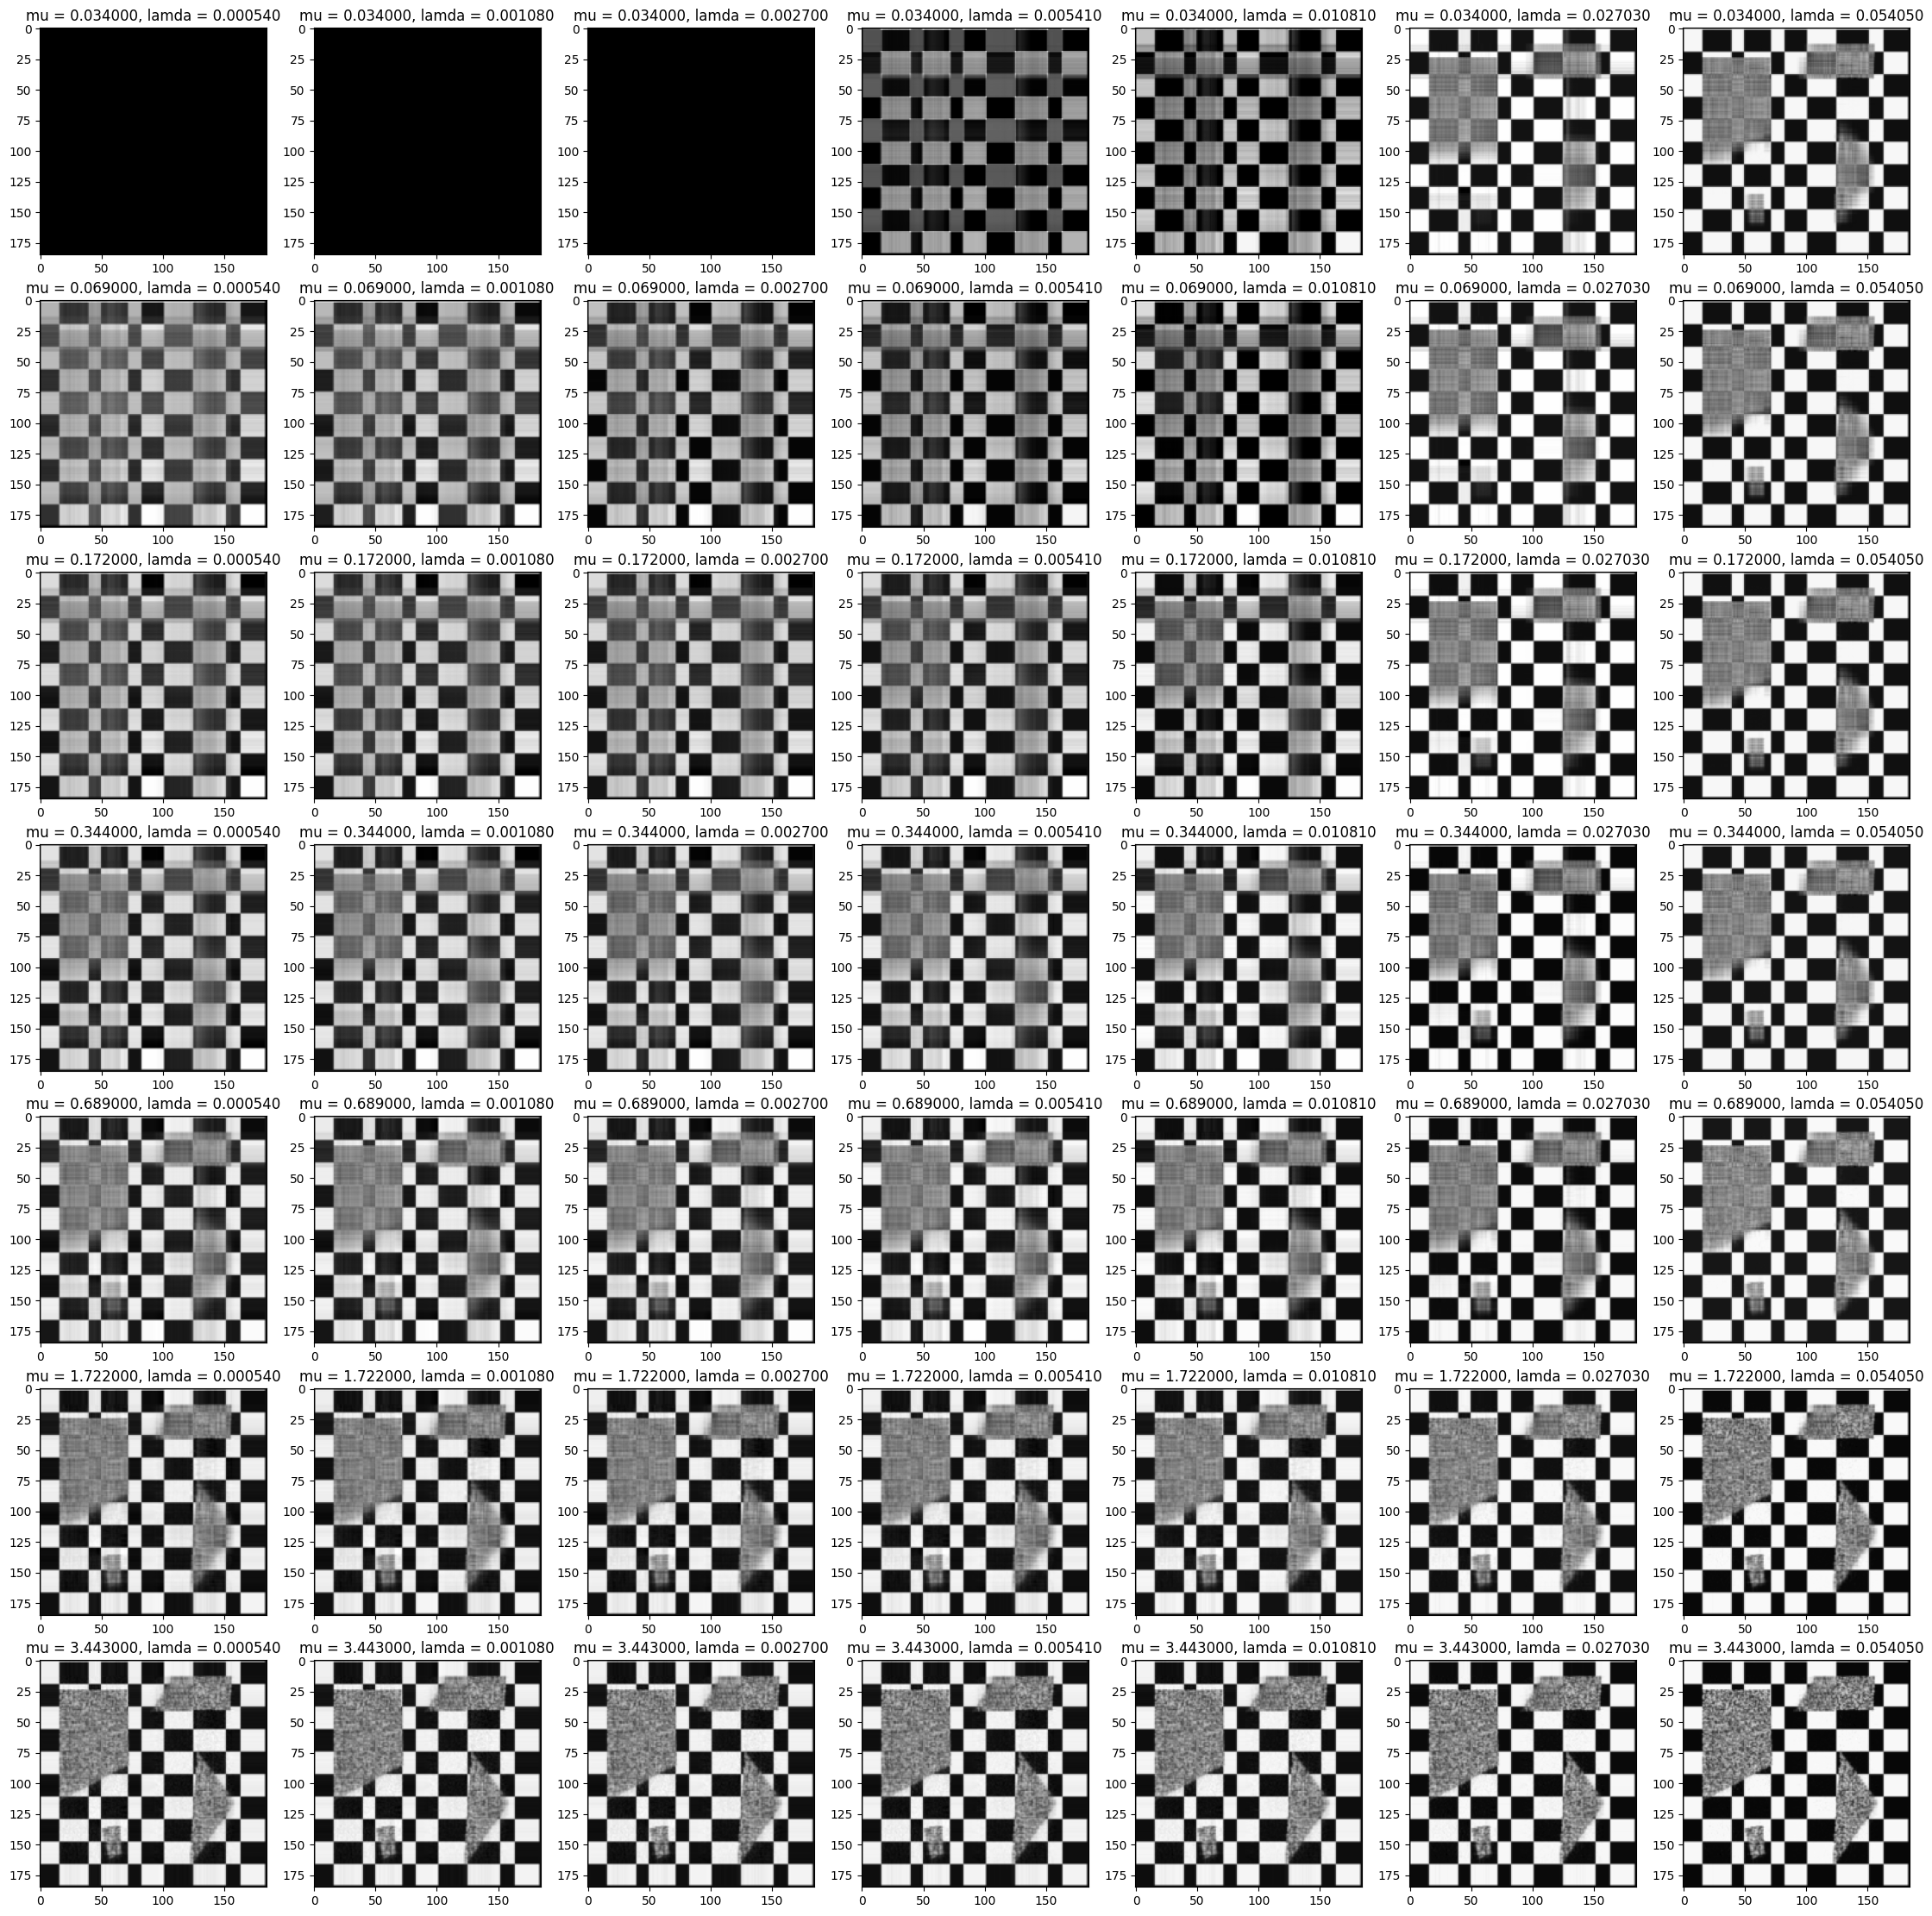

In [22]:
fig, axes = draw(Ls)

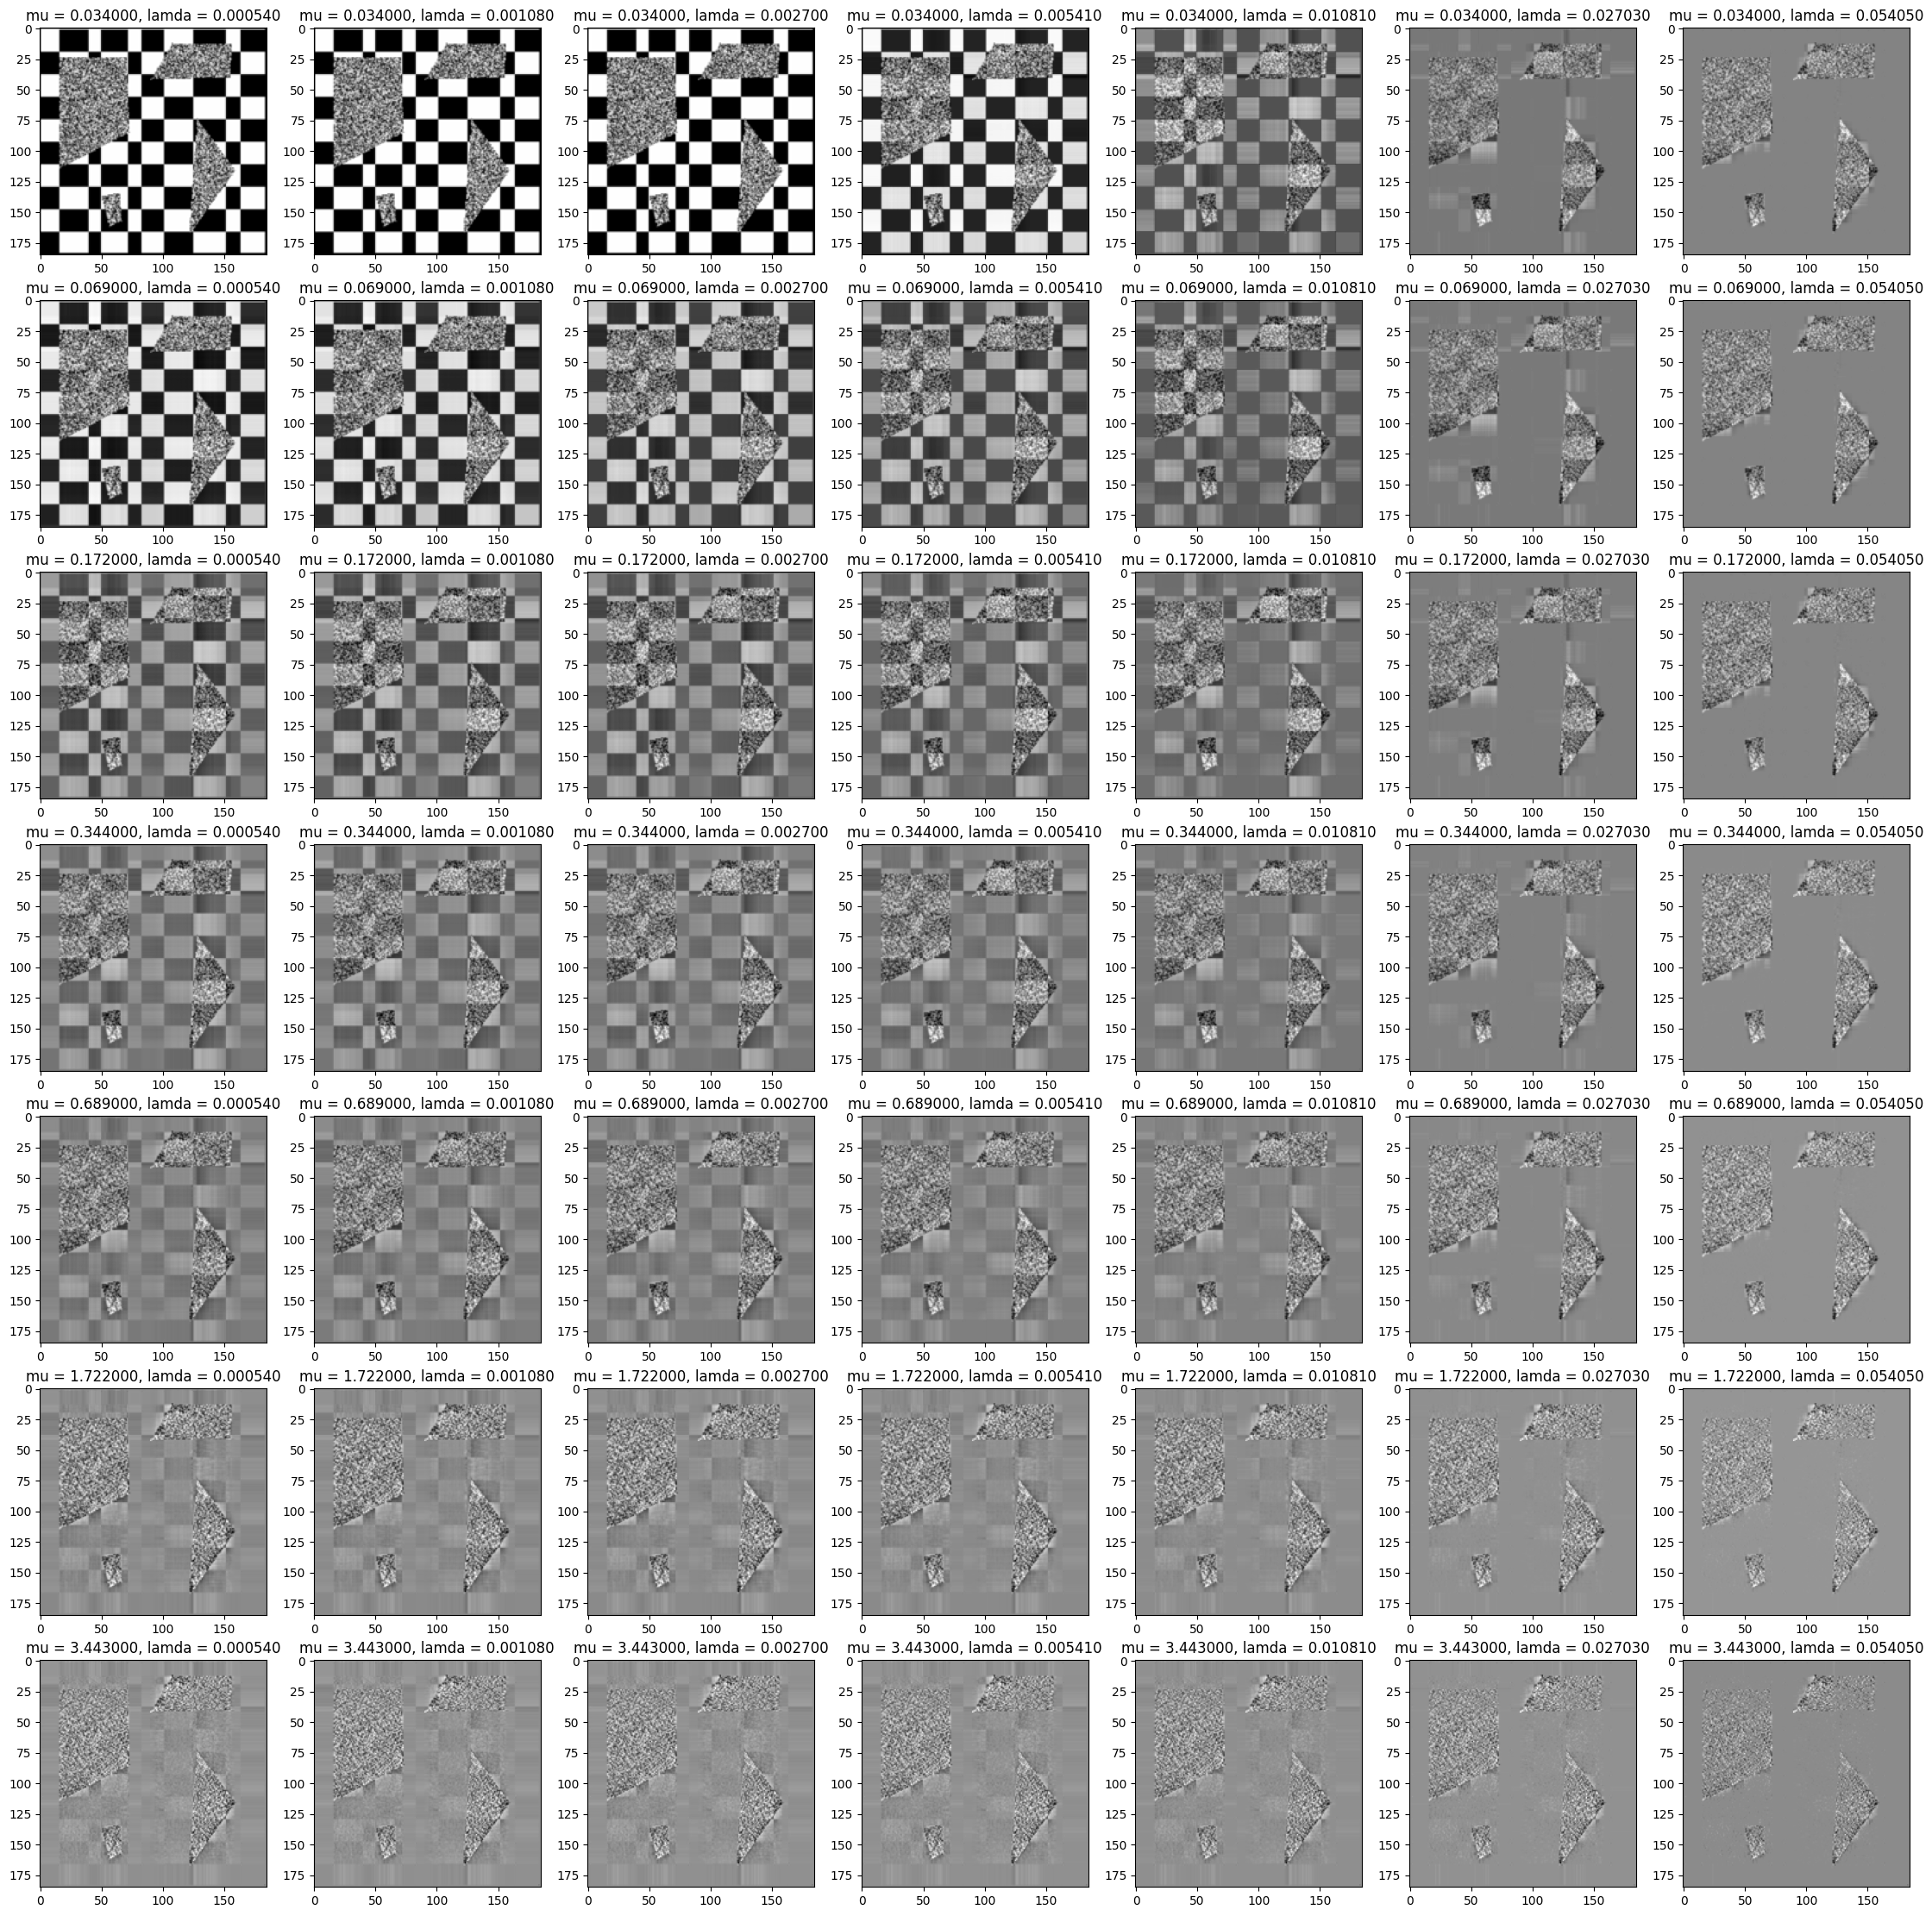

In [23]:
fig, axes = draw(Ss)

Max iterations
Max iterations
Max iterations
Max iterations
Max iterations
Max iterations
Max iterations


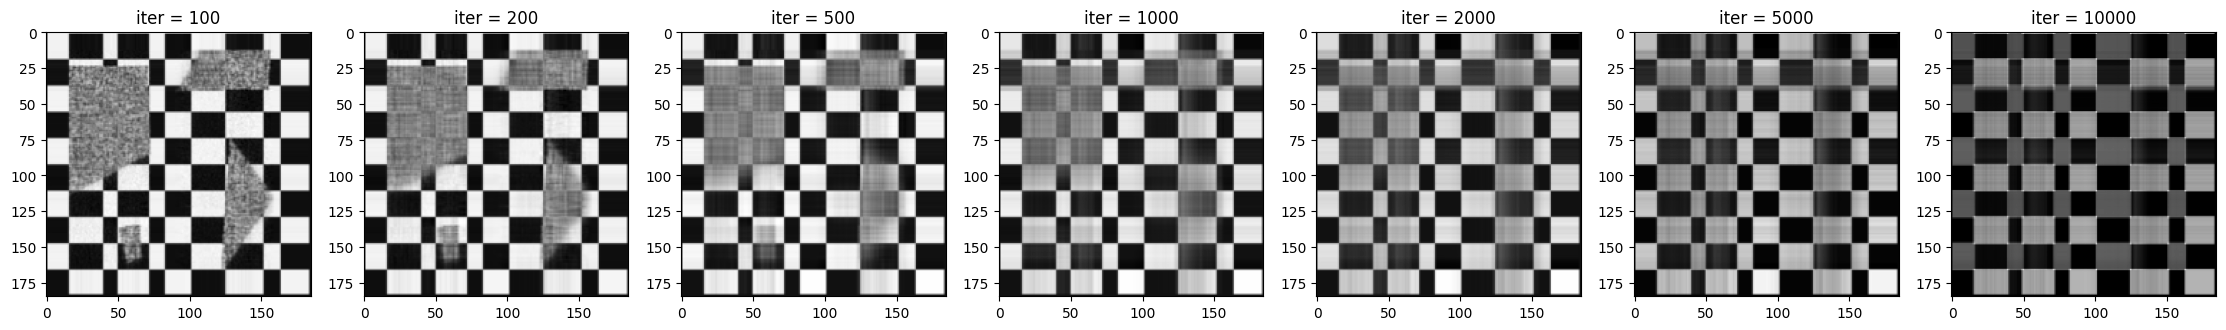

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(28, 4))
for i, iter in enumerate([100, 200, 500, 1000, 2000, 5000, 10000]):
    L, S = RPCA_(im, mu_base, lamda_base, max_iter=iter, tol=1e-5)
    axes[i].imshow(L, cmap=plt.cm.gray)
    axes[i].set_title('iter = %d' % iter)

In [26]:
def draw(pth, max_iter=1000): # figures/2.png
    im = getImgAsMatFromFile(pth)
    mu = im.shape[0]*im.shape[1]/(4*cp.norm(im, 1).value)
    lamda = 1/np.sqrt(im.shape[0]*im.shape[1])
    L, S = RPCA_(im, mu, lamda, max_iter=max_iter, tol=1e-5)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    axes[0].imshow(im, cmap=plt.cm.gray)
    axes[0].set_title('Original')
    axes[1].imshow(L, cmap=plt.cm.gray)
    axes[1].set_title('Low rank')
    axes[2].imshow(S, cmap=plt.cm.gray)
    axes[2].set_title('Sparse')

Max iterations


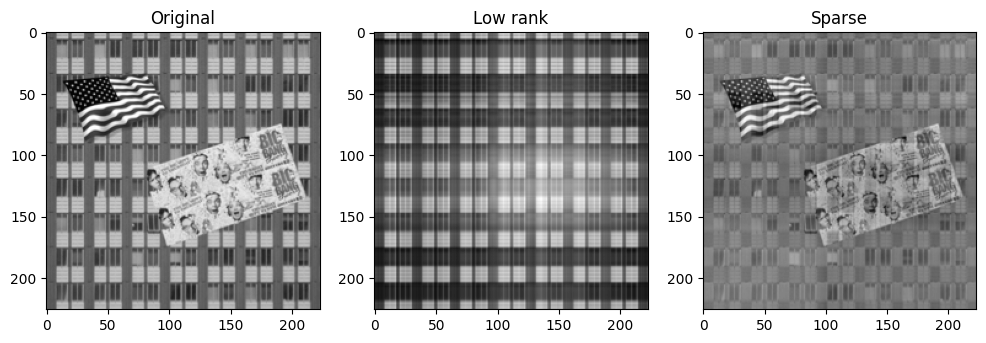

In [54]:
draw('figures/2.png', max_iter=1000)